Mean: 6.380046513471391, Std Dev: 6.946613125014036
Mean: 7.603920059705257, Std Dev: 25.73491928847624


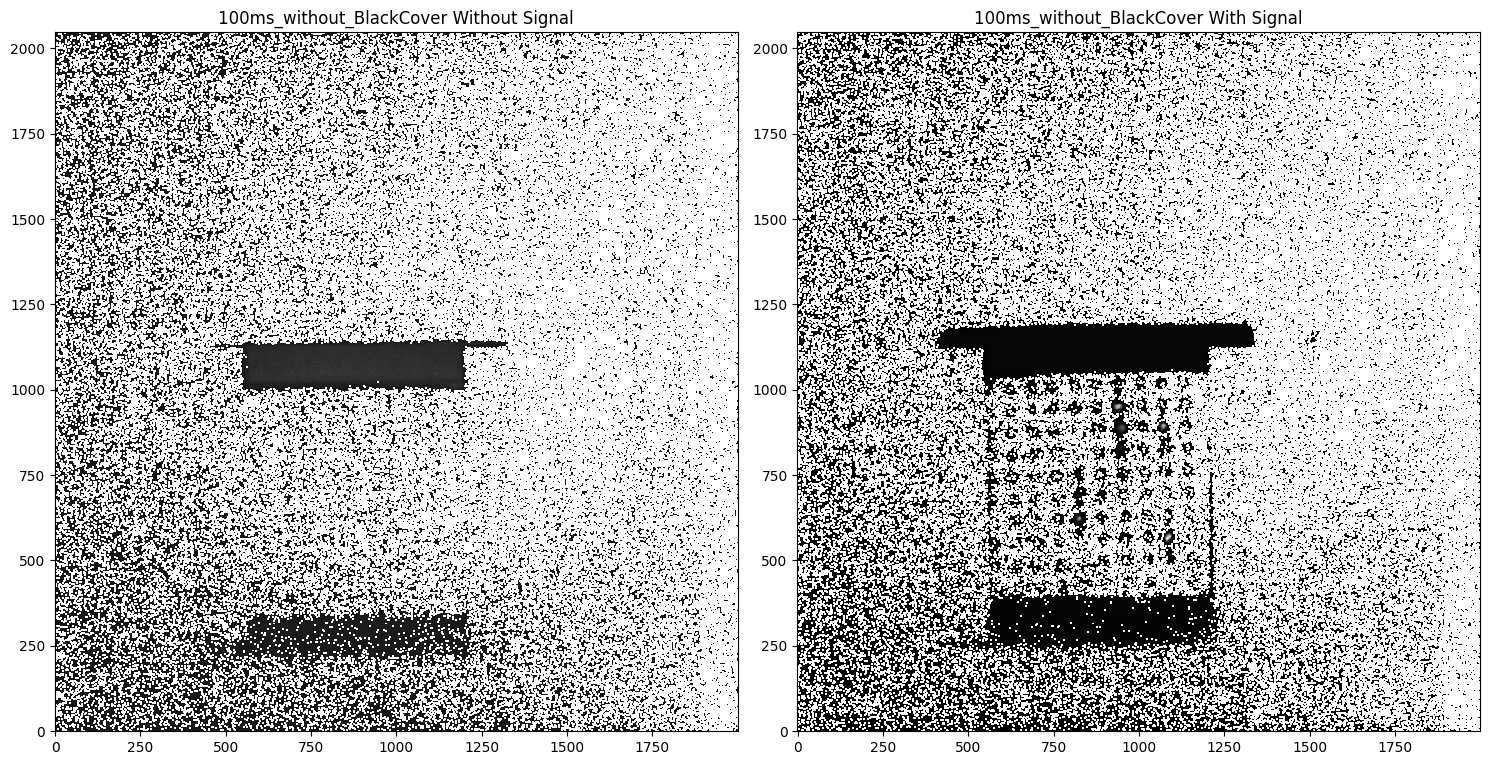

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.colors import LogNorm


def open_fits_file(ax, file_path, title):
    with fits.open(file_path) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data

    masked_image_data = np.ma.masked_invalid(image_data)
    min_val = np.nanmin(masked_image_data)
    max_val = np.nanmax(masked_image_data)

    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    z_scaled_data = (masked_image_data - mean_val) / std_val
    vmin = mean_val - 0.5 * std_val
    vmax = mean_val + 2 * std_val
    norm = LogNorm(vmin=5, vmax=10)

    print(f'Mean: {mean_val}, Std Dev: {std_val}')
    
    # Display the image
    im = ax.imshow(z_scaled_data, cmap='gray', origin='lower')
    ax.set_title(title)

def open_multiple_fits_files(file_paths, titles):
    fig, axes = plt.subplots(1, len(titles), figsize=(15, 8))

    for i in range(len(titles)):
        open_fits_file(axes[i], file_paths[i], titles[i])

    plt.tight_layout()
    plt.show()

without_signal = 'images/experiment 9/100ms_without_BlackCover/without_signal.fits'
with_signal = 'images/experiment 9/100ms_without_BlackCover/with_signal.fits'
file_paths = [without_signal, with_signal]
titles = ['100ms_without_BlackCover Without Signal', '100ms_without_BlackCover With Signal']

open_multiple_fits_files(file_paths, titles)


Mean: 7.603920059705257, Std Dev: 25.73491928847624
Mean: -2.2988077807634697e-08, Std Dev: 1.0000000271806693


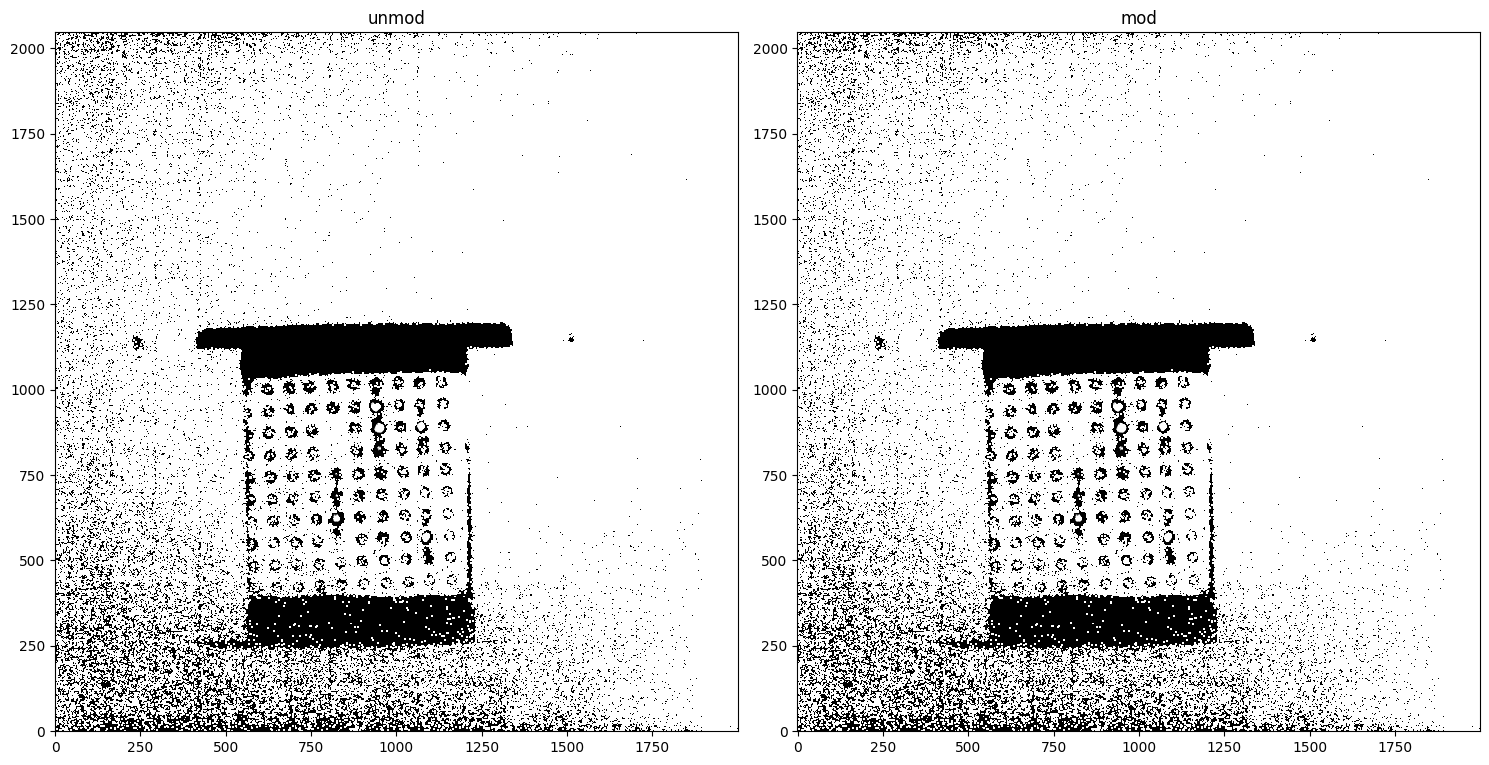

In [30]:
def modify_fits_file(input_file_path, output_file_path):
    # Open the FITS file
    with fits.open(input_file_path) as hdul:
        # Access the primary HDU
        primary_hdu = hdul[0]
        
        # Get the image data
        image_data = primary_hdu.data

    # Mask NaN values in the image data
    masked_image_data = np.ma.masked_invalid(image_data)

    # Z-scaling
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    z_scaled_data = (masked_image_data - mean_val) / std_val

    # Save the modified data to a new FITS file
    hdu = fits.PrimaryHDU(z_scaled_data.filled(np.nan))
    hdu.writeto(output_file_path, overwrite=True)

# Paths to the input and output FITS files
input_file_path = 'images/experiment 9/100ms_without_BlackCover/with_signal.fits'
output_file_path = 'images/experiment 9/output/with_signal_modified.fits'

# Modify the FITS file and save the result
modify_fits_file(input_file_path, output_file_path)

file_paths = [input_file_path, output_file_path]
titles = ['unmod', 'mod']
open_multiple_fits_files(file_paths, titles)

[[ 4. 17. 10. ... 12. 15.  9.]
 [12. 12. 13. ...  5. 11. 10.]
 [ 3. 15.  8. ...  3.  9.  5.]
 ...
 [16. 10. 10. ...  3.  9. 10.]
 [ 2.  9.  1. ...  8.  5.  3.]
 [ 5. 18. 20. ... nan nan  2.]]
[[ 4. 14. 16. ... 13.  1.  3.]
 [ 7. 15.  9. ...  4. 13.  9.]
 [ 9.  8. 14. ... nan 14. -1.]
 ...
 [-4. 12. 13. ...  7. -2. nan]
 [ 8. 14.  6. ...  5. -1. -1.]
 [ 6. 13. 11. ... -2. -3.  1.]]
[[  0.  -3.   6. ...   1. -14.  -6.]
 [ -5.   3.  -4. ...  -1.   2.  -1.]
 [  6.  -7.   6. ...  nan   5.  -6.]
 ...
 [-20.   2.   3. ...   4. -11.  nan]
 [  6.   5.   5. ...  -3.  -6.  -4.]
 [  1.  -5.  -9. ...  nan  nan  -1.]]


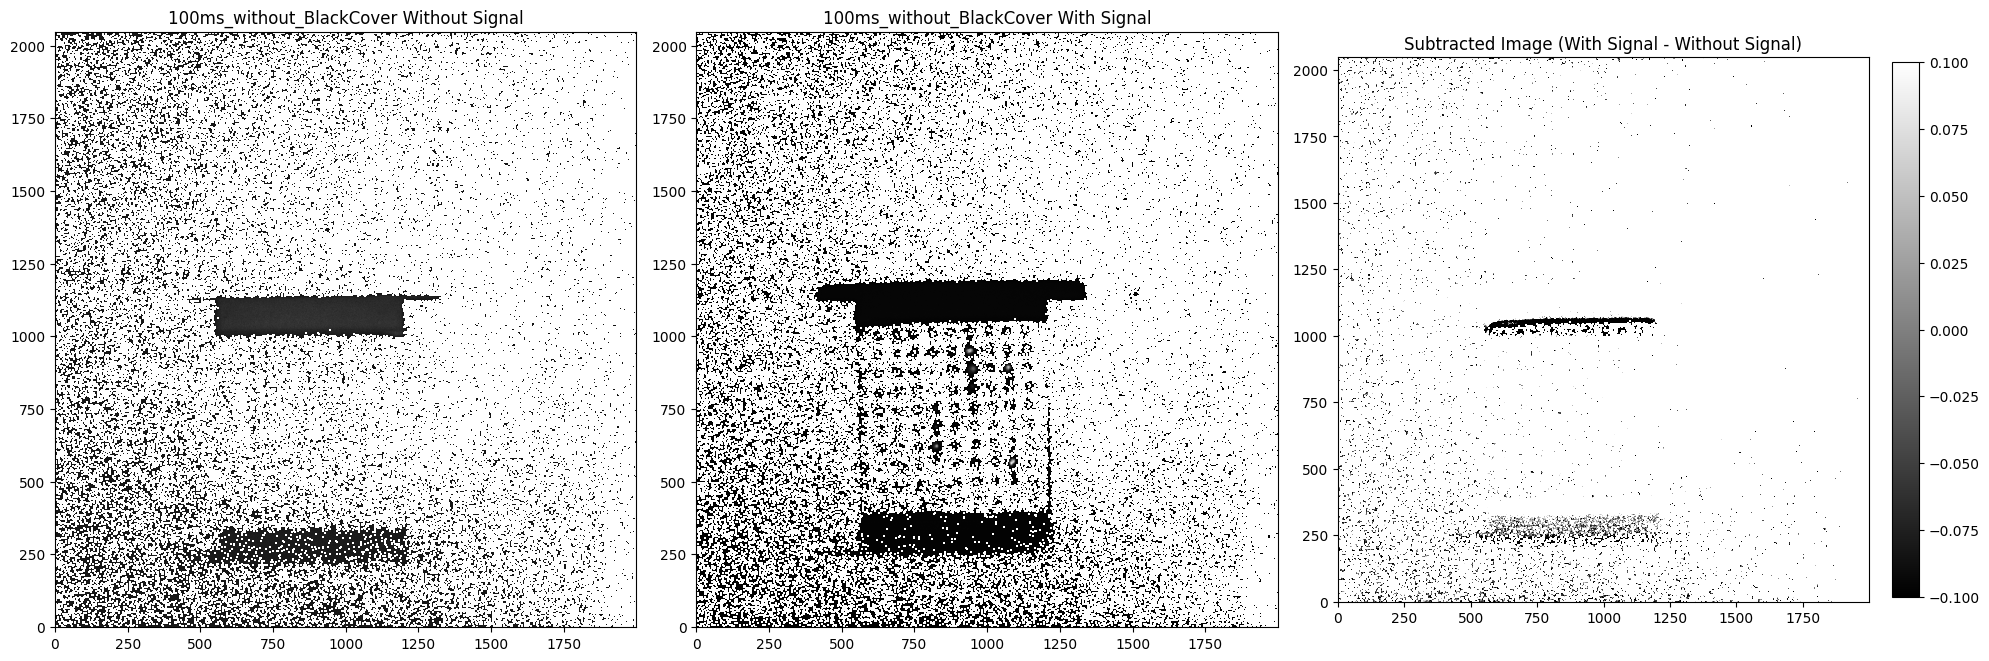

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.colors import Normalize
from astropy.visualization import ZScaleInterval

def open_fits_file(file_path):
    with fits.open(file_path) as hdul:
        primary_hdu = hdul[0]
        image_data = primary_hdu.data
    return image_data

def subtract_images(image1, image2):
    return image1 - image2

def display_image(ax, image_data, title, norm=None):
    z = ZScaleInterval()
    print(image_data)
    masked_image_data = np.ma.masked_invalid(image_data)
    mean_val = np.mean(masked_image_data)
    std_val = np.std(masked_image_data)
    z_scaled_data = (masked_image_data - mean_val) / std_val
    z1,z2 = z.get_limits(image_data)

    im = ax.imshow(z_scaled_data, cmap='gray', origin='lower', norm=norm)
    ax.set_title(title)
    return im

without_signal_path = 'images/experiment 9/100ms_without_BlackCover/without_signal.fits'
with_signal_path = 'images/experiment 9/100ms_without_BlackCover/with_signal.fits'

without_signal_data = open_fits_file(without_signal_path)
with_signal_data = open_fits_file(with_signal_path)

subtracted_data = subtract_images(with_signal_data, without_signal_data)

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

display_image(axes[0], without_signal_data, '100ms_without_BlackCover Without Signal')
display_image(axes[1], with_signal_data, '100ms_without_BlackCover With Signal')
norm = Normalize(vmin=np.min(subtracted_data), vmax=np.max(subtracted_data))
im = display_image(axes[2], subtracted_data, 'Subtracted Image (With Signal - Without Signal)', norm=norm)

fig.colorbar(im, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
